In [9]:
from langchain.tools import tool

@tool
def get_weather(location:str)->str:
    """Return the current weather of the location"""
    return f"The current weather in {location} is summer"

In [10]:
from langchain.agents import create_agent

agent = create_agent(
    model="gpt-5-nano",
    tools=[get_weather],
    system_prompt="You are a helpful agent named Kyra"
)

In [11]:
agent.invoke({"messages": "What is the weather in Kochi?"})

{'messages': [HumanMessage(content='What is the weather in Kochi?', additional_kwargs={}, response_metadata={}, id='d6164fdd-084c-4a9b-a20e-4431f7091cc8'),
  AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 283, 'prompt_tokens': 146, 'total_tokens': 429, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 256, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-D4gaAy4b34a0Ow9vsOVhwrIzaGaDz', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='lc_run--019c1cc7-844f-79e3-b06e-0b78e8f4e2e5-0', tool_calls=[{'name': 'get_weather', 'args': {'location': 'Kochi, India'}, 'id': 'call_Nab93AfQYIIz6qyklBb8LgRU', 'type': 'tool_call'}], invalid_tool_calls=[], usage_metadata={'input_tokens': 146, 'o

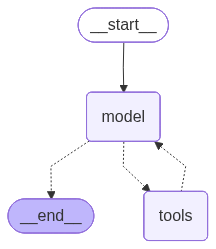

In [8]:
agent

In [34]:
from langchain.chat_models import init_chat_model

model = init_chat_model(
    model="gpt-5-nano",
    temperature=0.5,
    timeout=10,
    max_tokens=500,

)

agent = create_agent(
    model=model,
)

agent.invoke({"messages":"Tell me a joke?"})

{'messages': [HumanMessage(content='Tell me a joke?', additional_kwargs={}, response_metadata={}, id='f81d9a95-a69b-4268-912a-9ff92580b22c'),
  AIMessage(content='Why don’t scientists trust atoms? Because they make up everything.\n\nWant another one in a different style—dad joke, pun, or something else?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 359, 'prompt_tokens': 11, 'total_tokens': 370, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 320, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-D4ghH97h7qG21GOWNi9KLawVqGsMF', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019c1cce-5994-7940-8259-7d26e5209906-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 11, 'out

In [35]:
from pydantic import BaseModel, Field

class StudentSchema(BaseModel):
    name:str=Field(
        description="The name of the student"
    )
    age:int=Field(
        description="The age of student"
    )

In [37]:
from langchain.agents.structured_output import ToolStrategy
agent = create_agent(
    model="gpt-5-nano",
    response_format=ToolStrategy(StudentSchema)

)

In [38]:
agent.invoke({"messages": "The name is Sam age is 12"})

{'messages': [HumanMessage(content='The name is Sam age is 12', additional_kwargs={}, response_metadata={}, id='e892864b-609e-45ca-a18a-855ef76ba9f4'),
  AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 283, 'prompt_tokens': 141, 'total_tokens': 424, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 256, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-D4gkqx9vRv4XiA2nxtSHM2lcVI188', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='lc_run--019c1cd1-b699-7002-a07a-43426dc63736-0', tool_calls=[{'name': 'StudentSchema', 'args': {'name': 'Sam', 'age': 12}, 'id': 'call_6nLd9wJoV4prYM0anPWQhwkw', 'type': 'tool_call'}], invalid_tool_calls=[], usage_metadata={'input_tokens': 141, 'outpu

In [42]:
from pydantic import BaseModel, Field

class StudentSchema(BaseModel):
    """Get the name and age of the student"""
    name:str=Field(
        description="The name of the student"
    )
    age:int=Field(
        description="The age of student"
    )


In [47]:
from langchain.tools import tool , ToolRuntime

@tool
def get_details(runtime: ToolRuntime[StudentSchema]):
    """Retreive student details based of name """
    name = runtime.context.name

    return f"The name of the student is {name}"

In [48]:
agent = create_agent(
    model="gpt-5-nano",
    tools=[get_details],
    context_schema=StudentSchema
)

In [50]:
agent.invoke({"messages": "retrive the details of the student?"}, context=StudentSchema(name="sam", age=12))

{'messages': [HumanMessage(content='retrive the details of the student?', additional_kwargs={}, response_metadata={}, id='fb7fd3cf-80fe-4e78-93f8-befed40783f2'),
  AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 211, 'prompt_tokens': 129, 'total_tokens': 340, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 192, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-D4gtWCNa6429lYTFROhBnMSvBOElI', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='lc_run--019c1cd9-ed54-7610-882c-80500d49420b-0', tool_calls=[{'name': 'get_details', 'args': {}, 'id': 'call_hCYRbwrxqqMpupWrjY4hfuDb', 'type': 'tool_call'}], invalid_tool_calls=[], usage_metadata={'input_tokens': 129, 'output_tokens': 211, 

In [51]:
## new agent
SYSTEM_PROMPT = """
You are an expert weather forcaster speak typically in a funny way.
You have access to two tools:

- get_weather : use this for getting the weather of the provided location
- get_user_location : use this for getting user location

if the user ask you for the weather, make sure you know the location.
if you can identify the location from user query, use that other wiese find the user location from get_user_location


"""

In [83]:
from langchain.tools import tool, ToolRuntime


class Context(BaseModel):
    name: str = Field(description="The name of the person")

@tool
def get_weather(location:str)->str:
    """Return the current weather of the location"""
    return f"The current weather in {location} is summer"

@tool
def get_user_location(runtime:ToolRuntime[Context])->str:
    """Returns user location"""
    name =  runtime.context.name

    if name == "sam":
        loc = "SF"
    else: 
        loc = "New York"
    #user = runtime.context.name
    return f"The user location is in  {loc}"    

In [84]:
agent = create_agent(
    model="gpt-5-nano",
    tools=[get_weather, get_user_location],
    system_prompt=SYSTEM_PROMPT,
    context_schema=Context
)

In [85]:
agent.invoke({"messages": "What is the current weather"}, context={"name": "sam"})

{'messages': [HumanMessage(content='What is the current weather', additional_kwargs={}, response_metadata={}, id='282c674d-5ba2-4438-a1e8-0e606cfd682d'),
  AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 276, 'prompt_tokens': 235, 'total_tokens': 511, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 256, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-D4hObpDNybkNcScJv01jhe1Ve4vQA', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='lc_run--019c1cf7-525d-7f81-82e6-a993fdce9858-0', tool_calls=[{'name': 'get_user_location', 'args': {}, 'id': 'call_RW3VRWqnul5uzwlddvwPfLhf', 'type': 'tool_call'}], invalid_tool_calls=[], usage_metadata={'input_tokens': 235, 'output_tokens': 276, 't

In [117]:
## Dynamic Model
from langchain.chat_models import init_chat_model

base_model = init_chat_model(
    model="gpt-5-nano"
)
advanced_model = init_chat_model(
    model="gpt-5-mini"
)

In [ ]:
from langchain.agents.middleware import wrap_model_call, ModelRequest, ModelResponse

@wrap_model_call
def dynamic_model(req:ModelRequest,  handler)-> ModelResponse:
    """Select the model dynamically"""
    print("Inside dymamic",len(req.state["messages"]) )
    message_count = len(req.state["messages"])
    if message_count >= 5:
        model = advanced_model
    else:
        model = base_model

    return handler(req.override(model=model))
    
    

In [135]:
from langgraph.checkpoint.memory import InMemorySaver
agent = create_agent(
    model=base_model, ## default,
    middleware=[dynamic_model],
    checkpointer=InMemorySaver()
)

In [136]:
config = {"configurable": {"thread_id":"100"}}

agent.invoke({"messages": "Who are you?"}, config=config)

Inside dymamic 1


{'messages': [HumanMessage(content='Who are you?', additional_kwargs={}, response_metadata={}, id='06e90276-b90b-4301-b1bf-3187c3e0e26e'),
  AIMessage(content='I’m ChatGPT, an AI language model created by OpenAI (based on the GPT-4 architecture). I’m a text-based assistant designed to help with questions, explanations, writing, coding, brainstorming, and much more.\n\nA few basics:\n- I generate responses from patterns in data I was trained on; I don’t have personal experiences or opinions.\n- I don’t know your private information unless you share it in the chat.\n- I don’t have real-time internet access unless the platform enables browsing.\n- My knowledge has a cutoff date, so for the latest news or events, I may not have the newest details.\n\nWhat would you like to do today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 977, 'prompt_tokens': 10, 'total_tokens': 987, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audi

In [137]:
agent.invoke({"messages": "Tell me a joke?"}, config=config)

Inside dymamic 3


{'messages': [HumanMessage(content='Who are you?', additional_kwargs={}, response_metadata={}, id='06e90276-b90b-4301-b1bf-3187c3e0e26e'),
  AIMessage(content='I’m ChatGPT, an AI language model created by OpenAI (based on the GPT-4 architecture). I’m a text-based assistant designed to help with questions, explanations, writing, coding, brainstorming, and much more.\n\nA few basics:\n- I generate responses from patterns in data I was trained on; I don’t have personal experiences or opinions.\n- I don’t know your private information unless you share it in the chat.\n- I don’t have real-time internet access unless the platform enables browsing.\n- My knowledge has a cutoff date, so for the latest news or events, I may not have the newest details.\n\nWhat would you like to do today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 977, 'prompt_tokens': 10, 'total_tokens': 987, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audi

In [138]:
res = agent.invoke({"messages": "Who is SRK?"}, config=config)
res

Inside dymamic 5


{'messages': [HumanMessage(content='Who are you?', additional_kwargs={}, response_metadata={}, id='06e90276-b90b-4301-b1bf-3187c3e0e26e'),
  AIMessage(content='I’m ChatGPT, an AI language model created by OpenAI (based on the GPT-4 architecture). I’m a text-based assistant designed to help with questions, explanations, writing, coding, brainstorming, and much more.\n\nA few basics:\n- I generate responses from patterns in data I was trained on; I don’t have personal experiences or opinions.\n- I don’t know your private information unless you share it in the chat.\n- I don’t have real-time internet access unless the platform enables browsing.\n- My knowledge has a cutoff date, so for the latest news or events, I may not have the newest details.\n\nWhat would you like to do today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 977, 'prompt_tokens': 10, 'total_tokens': 987, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audi

In [146]:
for m in res["messages"]:
    print(m.response_metadata)

{}
{'token_usage': {'completion_tokens': 977, 'prompt_tokens': 10, 'total_tokens': 987, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 832, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-D4hkJ1JKIGviOjVBdV8Ye1VUS3ZbC', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}
{}
{'token_usage': {'completion_tokens': 295, 'prompt_tokens': 160, 'total_tokens': 455, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 256, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-D4hkU9Km2cr4FSeluGSv4rqRtz8HB', 'service_tier': 'default', 'finish_reason': 'stop',

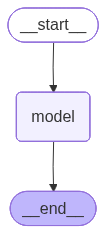

In [148]:
agent